In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


Ładowanie zbioru danych "cars"

In [22]:
df = pd.read_csv('data/cars.csv')

Przejrzenie zawartości zbioru i jego kształtu

In [23]:
df.shape

(392, 9)

In [24]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Przeprowadzenie konwersji spalania z mpg na l/100km oraz pojemności skokowej z cal^3 na litry

In [25]:
df['l/100km'] = round((((1/df['mpg']) * 3.78541) / 1.60934) * 100, 2) # 1 gal = 3.78541 l; 1 km = 1.60934 mi
df['displacement'] = round(df['displacement'] * 2.54 ** 3 / 1000, 1) # 1 cal = 2.54 cm

Odrzucenie zbędnej kolumny dotyczącej spalania w milach na galon

In [26]:
df.drop("mpg", axis=1, inplace=True)

Wyodrębnienie marki samochodu z kolumny z nazwą

In [27]:
df['brand'] = df['name'].str.split().str[0]

Sprawdzanie otrzymanego rezultatu

In [28]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,l/100km,brand
0,8,5.0,130,3504,12.0,70,1,chevrolet chevelle malibu,13.07,chevrolet
1,8,5.7,165,3693,11.5,70,1,buick skylark 320,15.68,buick
2,8,5.2,150,3436,11.0,70,1,plymouth satellite,13.07,plymouth
3,8,5.0,150,3433,12.0,70,1,amc rebel sst,14.70,amc
4,8,4.9,140,3449,10.5,70,1,ford torino,13.84,ford


In [29]:
df['brand'].value_counts()

brand
ford             48
chevrolet        43
plymouth         31
dodge            28
amc              27
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
oldsmobile       10
mazda            10
peugeot           8
fiat              8
audi              7
vw                6
volvo             6
chrysler          6
saab              4
subaru            4
opel              4
chevy             3
renault           3
cadillac          2
bmw               2
mercedes-benz     2
maxda             2
hi                1
toyouta           1
chevroelt         1
capri             1
mercedes          1
vokswagen         1
triumph           1
nissan            1
Name: count, dtype: int64

Poprawianie błędnych wartości tekstowych

In [30]:
df['brand'] = df['brand'].replace({
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen',
    'maxda': 'mazda',
    'chevy': 'chevrolet',
    'capri': 'ford',
    'toyouta': 'toyota',
    'chevroelt': 'chevrolet',
    'mercedes': 'mercedes-benz',
    'hi': 'international'
})

Tworzenie wykresu liczebności aut danej marki w zbiorze

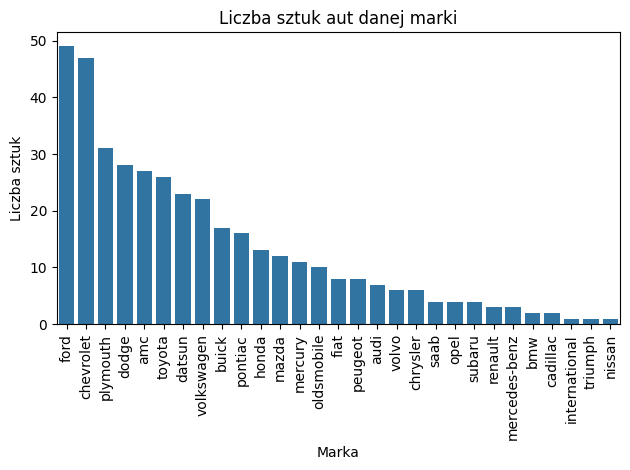

In [31]:
sns.countplot(data=df, x='brand', order=df['brand'].value_counts().index)
plt.title('Liczba sztuk aut danej marki')
plt.xlabel('Marka')
plt.ylabel('Liczba sztuk')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Sprawdzamy, czy w datasecie są wartości brakujące - nie ma

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    int64  
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    int64  
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   year          392 non-null    int64  
 6   origin        392 non-null    int64  
 7   name          392 non-null    object 
 8   l/100km       392 non-null    float64
 9   brand         392 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 30.8+ KB


In [33]:
df.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
l/100km         0
brand           0
dtype: int64

Badamy zbiór danych pod kątem zduplikowanych wierszy

In [34]:
df.duplicated().sum()

np.int64(0)

Regresja liniowa jest mało odporna na dane odstające, więc sprawdzamy dataset pod ich kątem

In [35]:
df.describe()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,l/100km
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,3.192092,104.469388,2977.584184,15.541327,75.979592,1.576531,11.248418
std,1.705783,1.711721,38.491160,849.402560,2.758864,3.683737,0.805518,3.913358
min,3.000000,1.100000,46.000000,1613.000000,8.000000,70.000000,1.000000,5.050000
25%,4.000000,1.700000,75.000000,2225.250000,13.775000,73.000000,1.000000,8.110000
50%,4.000000,2.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,10.340000
75%,8.000000,4.525000,126.000000,3614.750000,17.025000,79.000000,2.000000,13.840000
max,8.000000,7.500000,230.000000,5140.000000,24.800000,82.000000,3.000000,26.140000


Analiza wartości odstających przy pomocy wykresów pudekowych

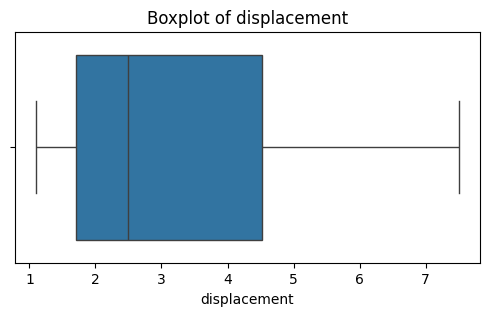

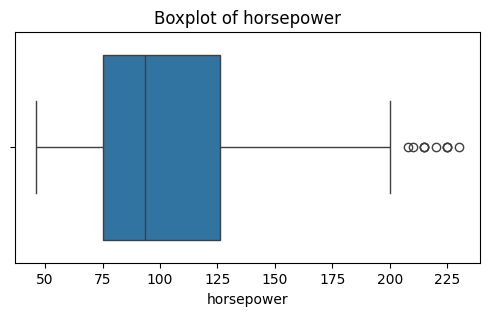

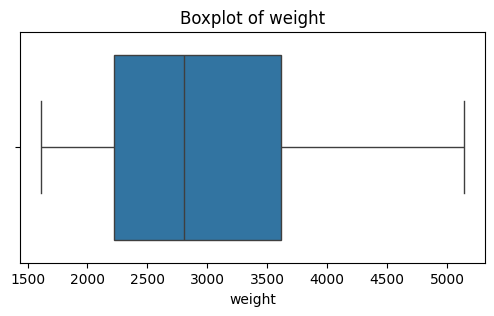

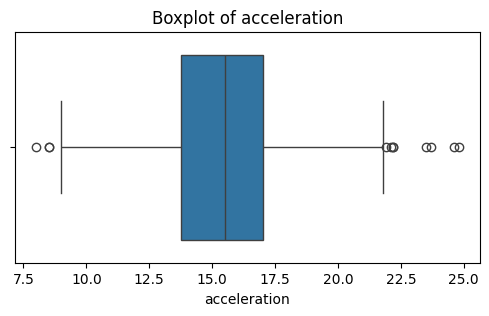

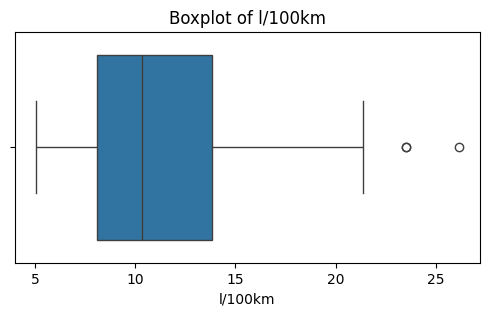

In [36]:
num_cols = ['displacement', 'horsepower', 'weight', 'acceleration', 'l/100km']
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

Wartości odstające przyjmują wartości prawdopodobne, więc nie będą usuwane